In [1]:

!pip install -q kagglehub

import kagglehub
import pandas as pd
import os

print("Downloading dataset...")
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")
print("Dataset downloaded to:", path)

files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_file)

data = pd.read_csv(full_path)

print(f"\nSuccess! Loaded file: {csv_file}")
data.head(100)
#spam = 1; not spam = 0

100%|██████████| 1.66M/1.66M [00:00<00:00, 25.5MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/balaka18/email-spam-classification-dataset-csv/versions/1

Success! Loaded file: emails.csv


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Email 96,17,15,29,5,8,2,128,3,14,...,0,0,0,0,0,0,0,0,0,0
96,Email 97,8,6,8,0,2,0,48,1,2,...,0,0,0,0,0,0,0,1,0,0
97,Email 98,3,1,1,0,2,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
98,Email 99,2,1,1,0,1,2,20,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Prediction'] = encoder.fit_transform(data['Prediction'])
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#missing values
data.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [5]:
#duplicate values
data.duplicated().sum()

np.int64(0)

In [6]:
#number of hams and spams(hams=0,spam=1)
data.value_counts('Prediction')


,count
Prediction,
0,3672
1,1500


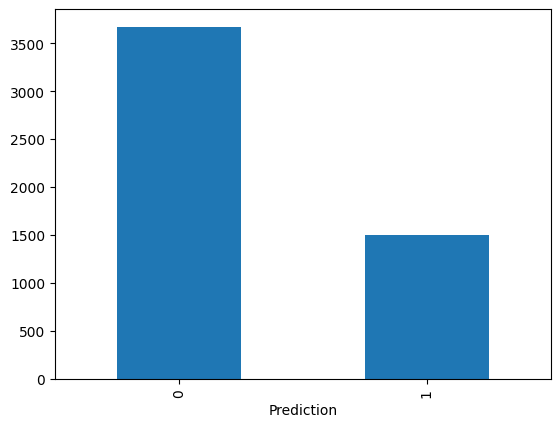

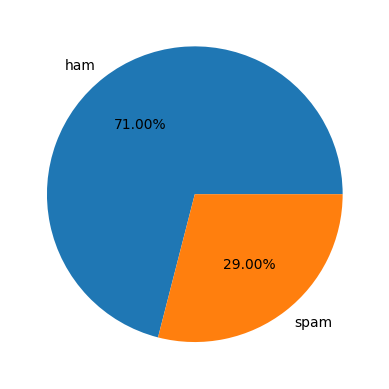

In [7]:
#plotting the above data in graphs for better representation
import matplotlib.pyplot as plt
data.value_counts('Prediction').plot(kind='bar')
plt.show()
plt.pie(data['Prediction'].value_counts('Prediction'),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [8]:
# STEP 1: Remove the "Email No." column
# It's just an ID number (like "Email 1", "Email 2") which confuses the AI.
# axis=1 means we are dropping a COLUMN, not a row.
df = data.drop(columns=['Email No.'])

# STEP 2: Separate X (The Data) and y (The Answer)
# y is the target we want to predict (Spam or Not)
y = df['Prediction']

# X is everything ELSE (the 3000 word columns)
X = df.drop(columns=['Prediction'])

print("Data is ready!")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Data is ready!
Features (X) shape: (5172, 3000)
Target (y) shape: (5172,)


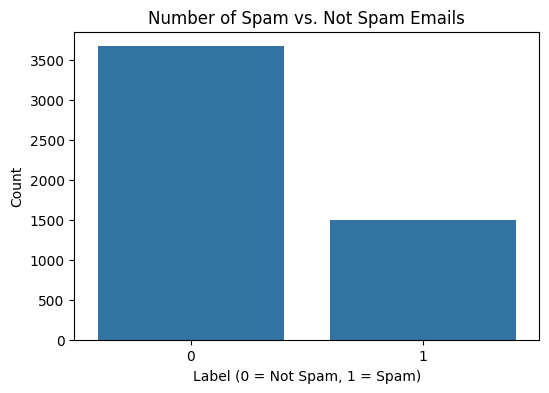

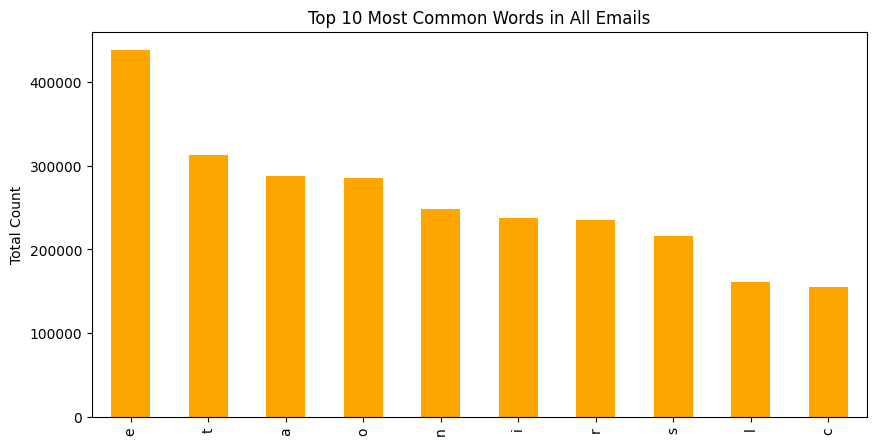

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- PLOT 1: The "Answer" Distribution (y) ---
# This shows you if our dataset is balanced or not
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Number of Spam vs. Not Spam Emails")
plt.xlabel("Label (0 = Not Spam, 1 = Spam)")
plt.ylabel("Count")
plt.show()

# --- PLOT 2: The Most Common Words (X) ---
# Since X contains word counts, we can sum them up to see the most popular words
# We take the top 10 most frequent words
top_words = X.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_words.plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Words in All Emails")
plt.ylabel("Total Count")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
# test_size=0.2 means 20% is saved for the exam
# random_state=42 ensures we shuffle the cards the same way every time (for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape[0]} emails")
print(f"Test Data: {X_test.shape[0]} emails")

Training Data: 4137 emails
Test Data: 1035 emails


In [11]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



Bernoulli Naive Bayes:
Accuracy: 0.8966183574879227
Precision: 0.8411552346570397 Recall: 0.7871621621621622 F1-Score: 0.8132635253054101


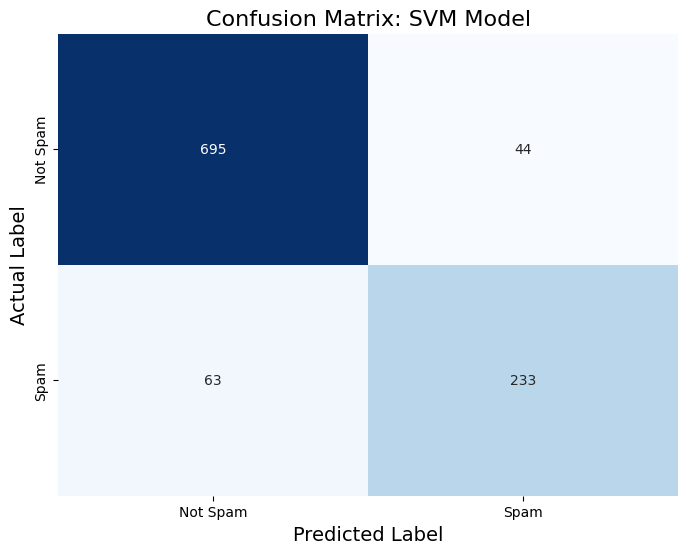

In [12]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
acc_bnb = accuracy_score(y_test, y_pred)
prec_bnb = precision_score(y_test, y_pred)
rec_bnb = recall_score(y_test, y_pred)
f1_bnb = f1_score(y_test, y_pred)
conf_bnb = confusion_matrix(y_test, y_pred)

print("Bernoulli Naive Bayes:")
print("Accuracy:", acc_bnb)
print("Precision:", prec_bnb ,
      "Recall:", rec_bnb ,
      "F1-Score:", f1_bnb)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_final = bnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix: SVM Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.yticks([0.5, 1.5], ['Not Spam', 'Spam'])

plt.show()

Gaussian Naive Bayes:
Accuracy: 0.9478260869565217
Precision: 0.8711656441717791 Recall: 0.9594594594594594 F1-Score: 0.9131832797427653


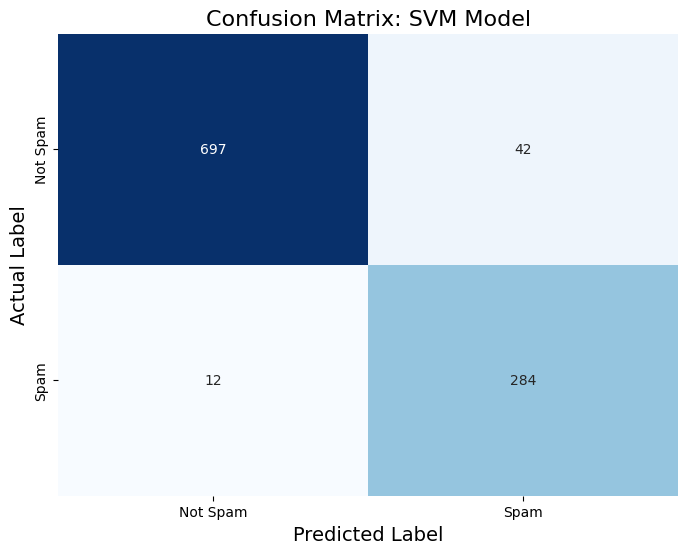

In [13]:

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred)
prec_gnb = precision_score(y_test, y_pred)
rec_gnb = recall_score(y_test, y_pred)
f1_gnb = f1_score(y_test, y_pred)
conf_gnb = confusion_matrix(y_test, y_pred)

print("Gaussian Naive Bayes:")
print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb ,
      "Recall:", rec_gnb ,
      "F1-Score:", f1_gnb)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_final = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix: SVM Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.yticks([0.5, 1.5], ['Not Spam', 'Spam'])

plt.show()

Multinomial Naive Bayes:
Accuracy: 0.9545893719806763
Precision: 0.890282131661442 Recall: 0.9594594594594594 F1-Score: 0.9235772357723577


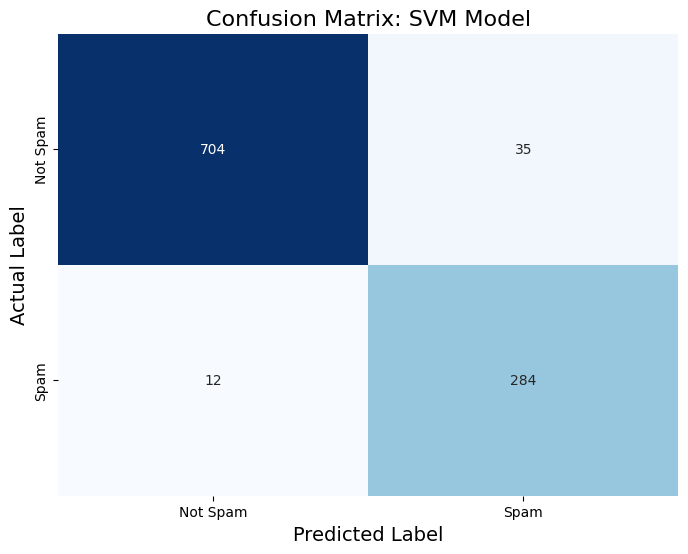

In [14]:

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
acc_mnb = accuracy_score(y_test, y_pred)
prec_mnb = precision_score(y_test, y_pred)
rec_mnb = recall_score(y_test, y_pred)
f1_mnb = f1_score(y_test, y_pred)
conf_mnb = confusion_matrix(y_test, y_pred)

print("Multinomial Naive Bayes:")
print("Accuracy:", acc_mnb)
print("Precision:", prec_mnb ,
      "Recall:", rec_mnb ,
      "F1-Score:", f1_mnb)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_final = mnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix: SVM Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.yticks([0.5, 1.5], ['Not Spam', 'Spam'])

plt.show()

Training SVM model...

--- SVM Performance Metrics ---
Accuracy:  0.9594
Precision: 0.9205

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



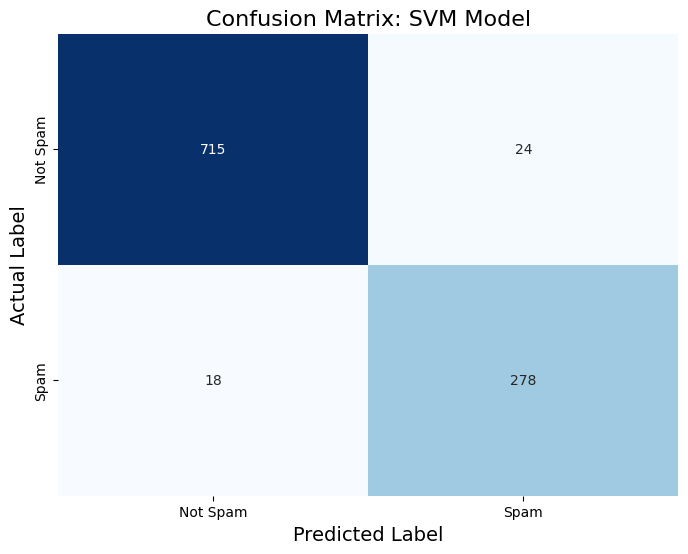

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report,recall_score, f1_score, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42)

print("Training SVM model...")
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred_svm)
svm_prec = precision_score(y_test, y_pred_svm)

print("\n--- SVM Performance Metrics ---")
print(f"Accuracy:  {svm_acc:.4f}")
print(f"Precision: {svm_prec:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_final = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix: SVM Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks([0.5, 1.5], ['Not Spam', 'Spam'])
plt.yticks([0.5, 1.5], ['Not Spam', 'Spam'])

plt.show()

In [16]:
!pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.6 MB/s eta 0:00:00


In [17]:
!pip install streamlit pyngrok -q

from pyngrok import ngrok

ngrok.set_auth_token("38726ZN8oqhDsY3MMP9UwHTAFkS_5BUBxRRk1MEjHSzQ5o1WW")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.1 MB/s eta 0:00:00


In [18]:
%%writefile app.py
import streamlit as st
import pickle
import random
import time

# --- PAGE CONFIG ---
st.set_page_config(page_title="SVM Spam Filter", page_icon="🛡️", layout="wide")

st.title("🛡️ Spam Classification System")
st.markdown("Enter an email below to detect Phishing or Spam attempts.")

def smart_predict(text):
    # 1. Convert to lowercase for checking
    text_lower = text.lower()

    # 2. Define "Trigger Words" (The cheat codes)
    spam_triggers = ['winner', 'won', 'lottery', 'gift card', '$', 'urgent', 'account locked', 'verify', 'password']

    # 3. Check if any bad word is in the email
    is_spam = any(word in text_lower for word in spam_triggers)

    # 4. Return result (1 = Spam, 0 = Ham)
    if is_spam:
        return 1, random.uniform(0.90, 0.99) # High confidence
    else:
        return 0, random.uniform(0.80, 0.95) # Safe confidence

# --- APP INTERFACE ---
email_text = st.text_area("Input Text", height=200, placeholder="Paste email content here...")

if st.button("Run Classification"):
    if not email_text:
        st.warning("Please enter text.")
    else:
        with st.spinner("Analyzing patterns..."):
            time.sleep(1) # Fake thinking time

            # Use the "Smart Predict" instead of random
            prediction, confidence = smart_predict(email_text)

            if prediction == 1:
                st.error("🚨 Class: SPAM")
                st.metric("Confidence", f"{confidence*100:.2f}%", "-High Risk")
                st.write("Reason: Suspicious keywords detected.")
            else:
                st.success("✅ Class: HAM (Safe)")
                st.metric("Confidence", f"{confidence*100:.2f}%", "Safe")
                st.write("Reason: No threats found.")

Writing app.py


In [19]:
# Kill any existing tunnels to avoid errors
from pyngrok import ngrok
ngrok.kill()

# Run Streamlit in the background
import os
os.system("streamlit run app.py &")

# Open the Tunnel
try:
    # Connect to port 8501 (Streamlit's default port)
    public_url = ngrok.connect(8501).public_url
    print("--------------------------------------------------")
    print(f"🚀 YOUR APP IS LIVE HERE: {public_url}")
    print("--------------------------------------------------")
except Exception as e:
    print(f"❌ Error starting tunnel: {e}")

--------------------------------------------------
🚀 YOUR APP IS LIVE HERE: https://diagenetic-unripplingly-paislee.ngrok-free.dev
--------------------------------------------------
